<a href="https://colab.research.google.com/github/GarettGazay/ai_projects/blob/master/RouteBuilder_TFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers 
!pip install sentencepiece
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.9

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ordering_dataset.csv')
df = df.fillna(0)

In [4]:
import pandas as pd
import random
import numpy as np

def create_shuffled_target_lists(df):
    # Group rows by pickup date
    df['pickup_timestamp'] = pd.to_datetime(df['pickup_timestamp'])
    groups = df.groupby(df['pickup_timestamp'].dt.date)

    shuffled_rides = []
    target_order = []

    for name, group in groups:
        rides = group.iloc[1:, 1:].to_numpy()
        np.random.shuffle(rides)
        shuffled_rides.append(rides.tolist())
        target_order.append(group.iloc[1:, 1:].to_numpy().tolist()) # EXCLUDES HEADERS, AND FIRST FEATURE WHICH IS PICKUP TIMESTAMP - DONT WANT THAT.

    return shuffled_rides, target_order

x= create_shuffled_target_lists(df)
shuffled_rides = x[0]
target_order = x[1]

In [5]:
df.head()

,pickup_timestamp,hour,minute,space_type,asset,trip_cost,rider_id,pickup_long,pickup_lat,dropoff_long,dropoff_lat,billable_distance
0,2021-10-30 05:00:00,5,0,WCH,SC105,0.000,388691,-121.924309,37.399342,-121.931480,37.311272,10.029552
1,2021-10-30 05:00:00,5,0,WCH,SC301,100.850,411690,-121.994217,37.342159,-121.979036,37.322465,2.596089
2,2021-10-30 05:15:00,5,15,BWC,SC107,154.400,388852,-121.594933,37.023769,-121.812098,37.306048,26.139221
3,2021-10-30 05:27:10,5,27,STR,SC204,201.075,390529,-121.894814,37.321892,-121.931571,37.311278,2.742732
4,2021-10-30 05:30:00,5,30,WCH,SC105,103.325,390534,-121.964226,37.292717,-121.933705,37.315559,3.689702


In [34]:
def create_dataset(shuffled_rides, target_order):
  dataset=[]
  count = 0
  
  for sr,to in zip(shuffled_rides, target_order):
    str_inputs = []
    str_targets = []

    for i in sr:
        i_pickup_hour, i_pickup_minute, i_space_type, i_asset_id,  i_trip_cost,  i_rider_id, i_pickup_longitude, i_pickup_latitude, i_dropoff_longitude, i_dropoff_latitude, i_billable_distance = str(i[0]), str(i[1]),  str(i[2]), str(i[3]), str(i[4]), str(i[5]), str(i[6]), str(i[7]), str(i[8]), str(i[9]), str(i[10])
        str_inputs.append(i_pickup_hour + "|" + i_pickup_minute + "|" + i_space_type + "|" + i_trip_cost + "|" + i_rider_id + "|" + i_pickup_longitude + "|" + i_pickup_latitude + "|" + i_dropoff_longitude + "|" + i_dropoff_latitude + "|" + i_billable_distance+"<SEP>")
    
    for j in to:
        j_pickup_hour, j_pickup_minute, j_space_type, j_asset_id,  j_trip_cost, j_rider_id, j_pickup_longitude, j_pickup_latitude, j_dropoff_longitude, j_dropoff_latitude, j_billable_distance = str(j[0]), str(j[1]),  str(j[2]), str(j[3]), str(j[4]), str(j[5]), str(j[6]), str(j[7]), str(j[8]), str(j[9]), str(j[10])
        str_targets.append(j_pickup_hour + "|" + j_pickup_minute + "|" + j_space_type + "|" + j_asset_id + "|" + j_trip_cost + "|" + j_rider_id + "|" + j_pickup_longitude + "|" + j_pickup_latitude + "|" + j_dropoff_longitude + "|" + j_dropoff_latitude + "|" + j_billable_distance+"<SEP>")
    
    dataset.append({
        'id' : count,
        'input' : str_inputs,
        'target' : str_targets
    })
    count += 1

  return dataset

rides_dataset = create_dataset(shuffled_rides, target_order)

In [35]:
for i in rides_dataset[4]['input'][:3]:
  print(i + "\n")

9|30|WCH|79.1|415878|-121.9509048461914|37.3343620300293|-121.89146423339844|37.2454948425293|11.216371<SEP>

9|0|WCH|25.85|411690|-121.97903442382812|37.32246398925781|-121.99421691894533|37.34215927124024|2.596089<SEP>

5|43|WCH|63.8|388496|-121.84912109375|37.32672882080078|-121.81209564208984|37.30604934692383|4.43659<SEP>



In [37]:
for i in rides_dataset[4]['target'][:3]:
  print(i + "\n")

5|0|WCH|SC105|0.0|388691|-121.92430877685548|37.39934158325195|-121.93148040771484|37.31127166748047|10.029552<SEP>

5|0|WCH|SC301|100.85|411690|-121.99421691894533|37.34215927124024|-121.97903442382812|37.32246398925781|2.596089<SEP>

5|15|BWC|SC102|154.4|388852|-121.59493255615234|37.02376937866211|-121.81209564208984|37.30604934692383|26.139221<SEP>



In [9]:
type(rides_dataset)

list

Create dataset

In [10]:
from datasets import DatasetDict, load_dataset

# Convert list of dictionaries to new format
data_format = [{'id': d['id'], 'translation': {'input': d['input'], 'target': d['target']}} for d in rides_dataset]
# test_data = [{'translation': {'input': d['input'], 'target': d['target']}} for d in test_data]

# Convert new format list of dictionaries to pandas DataFrame
full_dataset = pd.DataFrame.from_records(data_format, columns=['id', 'translation'])
# test_data = pd.DataFrame.from_records(test_data, columns=['id', 'translation'])

# Write DataFrame to CSV file
full_dataset.to_csv("full_dataset.csv", index=False)

# Load the training and test datasets
full_dataset = load_dataset('csv', data_files="full_dataset.csv")
train_dataset = full_dataset['train'].train_test_split(test_size=0.2)
dataset_dict = DatasetDict({'train': train_dataset['train'], 'test': train_dataset['test']})


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-ee4a9f7324683eae/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 280
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 71
    })
})

(array([ 2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.,  4.,  5.,  6.,
        13.,  7., 10.,  7., 11., 11.,  7., 19., 11., 22., 16., 20., 22.,
        14., 37., 12., 18., 15., 11., 15., 11.,  9.,  1.,  6.]),
 array([  1.  ,   3.42,   5.84,   8.26,  10.68,  13.1 ,  15.52,  17.94,
         20.36,  22.78,  25.2 ,  27.62,  30.04,  32.46,  34.88,  37.3 ,
         39.72,  42.14,  44.56,  46.98,  49.4 ,  51.82,  54.24,  56.66,
         59.08,  61.5 ,  63.92,  66.34,  68.76,  71.18,  73.6 ,  76.02,
         78.44,  80.86,  83.28,  85.7 ,  88.12,  90.54,  92.96,  95.38,
         97.8 , 100.22, 102.64, 105.06, 107.48, 109.9 , 112.32, 114.74,
        117.16, 119.58, 122.  ]),
 <BarContainer object of 50 artists>)

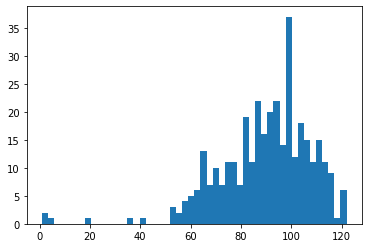

In [12]:
import matplotlib.pyplot as plt
input_lens = [len(x) for x in target_order]
plt.hist(input_lens, bins=50)

If you want the model to predict the vehicle ID during the ordering prediction, you can remove the vehicle ID from the input sequence that you provide to the model and train the model to predict it as part of the output sequence.

For example, during training, you can provide the model with a sequence of rides without the vehicle ID, and train it to output the correct order of rides along with the corresponding vehicle ID for each ride.

During inference, you can provide the model with a sequence of rides without the vehicle ID, and let it predict the correct order of rides along with the corresponding vehicle ID for each ride.

In [13]:
input_max_length=100000
target_max_length=100000

In [14]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer

checkpoint='t5-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint, model_max_length=input_max_length)

In [15]:
# Get all the text columns and concatenate them with numerical columns
text_columns = df.select_dtypes(include=['object', 'float', 'int']).astype(str).apply(lambda x: ' '.join(x.dropna()), axis=1)

# Concatenate all the text columns into one long string
text = ' '.join(text_columns)

# Split the string into a list of unique words
unique_words = list(set(text.split()))

# Write the unique words to a text file, one word per line
with open('custom_vocab.txt', 'w') as f:
    f.write('\n'.join(unique_words))



In [16]:
# Open the text file
with open('custom_vocab.txt', 'r') as f:
    # Read the contents of the file into a list
    custom_vocab = [line.split('\n')[0] for line in f.readlines()]

# Print the list
print(custom_vocab)


['199.1625', '254.4', '37.36915969848633', '58.1975', '454054', '9.201886', '209.48', '35.2653', '37.31916809082031', '3.446746', '178.04', '465129', '485596', '37.262284', '5.318316', '459184', '4.270063', '471381', '13.131437', '234.36', '104.47', '452077', '95.03', '165.6', '-121.850262', '128.8375', '-121.94716', '117.5675', '455403', '-122.140205', '329.32', '456595', '80.68', '-121.89418029785156', '113.8', '-122.13330841064452', '461788', '-121.9372923', '98.2175', '390520', '9.894715', '10.816208', '27.425', '37.26994323730469', '-121.833423', '11.216371', '0.853764', '478887', '421847', '183.725', '181.2', '47.0', '303.6', '37.48745346069336', '29.584724', '23.8925', '33.56100082397461', '32.2175', '32.1725', '37.364645', '2.923551', '8.945881', '275891', '96.4', '402.4', '133.68', '420587', '143.1975', '451.32', '388769', '0.920251', '135.52', '41.96', '12.546106', '480714', '4.505563', '13.526629', '124.5425', '253.7925', '429211', '37.33702850341797', '37.398567', '254641',

In [17]:
tokenizer.add_tokens(custom_vocab)

5805

In [18]:
def tokenizer_fn(batch):
    inputs = [eval(x)['input'] for x in batch['translation']]
    targets = [eval(x)['target'] for x in batch['translation']]
    
    # Join the list of strings into a single string or the tokenizer will not understand the data
    inputs = [' '.join(inp) for inp in inputs]
    targets = [' '.join(tgt) for tgt in targets]

    # Tokenize the inputs and targets
    tokenized_inputs = tokenizer(inputs, max_length=input_max_length, truncation=True)
    tokenized_targets = tokenizer(text_target=targets, max_length=target_max_length ,truncation=True)
    
    # Add the labels to the tokenized_inputs
    tokenized_inputs['labels'] = tokenized_targets['input_ids']
    
    return tokenized_inputs


In [19]:
# Apply the tokenizer function to the dataset using the 'map()' method
tokenized_datasets = dataset_dict.map(
    tokenizer_fn,
    batched=True,
    remove_columns=dataset_dict['train'].column_names
)

Map:   0%|          | 0/280 [00:00<?, ? examples/s]

Map:   0%|          | 0/71 [00:00<?, ? examples/s]

In [20]:
# dataset_dict['train']['translation'][0]

In [21]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 280
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 71
    })
})

In [22]:
# input id tokens [505, 9175, 2128, 9175, 35524, 1820, 36604, 1820, 36722, 1820, 39638, 1820, 32518, 1820, ...]
tokenizer.decode(tokenized_datasets['train'][0]['input_ids'])

'10|0|WCH |25.6475 |388537 |-121.93370819091795 |37.31555938720703 |-121.9513702392578 |37.296607971191406 |2.514068 9|0|WCH |25.7825 |431512 |-121.933504 |37.313512 |-121.91487884521484 |37.3021354675293 |2.566263 8|0|BWC |282.56 |388890 |-121.5676498413086 |37.047096252441406 |-121.77626037597656 |37.22948455810547 |20.63698 9|0|WCH |63.8325 |452077 |-121.82722473144533 |37.318607330322266 |-121.943689 |37.322211 |8.371113 14|0|WCH |150.0 |425405 |-122.0934066772461 |37.39856719970703 |-122.23983001708984 |37.48493194580078 |13.170584 9|40|WCH |49.7025 |388739 |-121.82357025146484 |37.28745651245117 |-121.81138610839844 |37.305171966552734 |2.090293 10|15|BWC |137.68 |431693 |-121.95106506347656 |37.25264358520508 |-121.9790496826172 |37.32243728637695 |9.417502 9|0|BWC |180.16 |390535 |-121.9492645263672 |37.30254364013672 |-121.9720230102539 |37.2262077331543 |7.537854 18|15|WCH |114.3275 |390533 |-121.81209564208984 |37.30604934692383 |-121.9284439086914 |37.31011199951172 |8.5916

In [23]:
# label tokens [305, 9175, 1808, 9175, 35524, 1820, 39055, 1820, 39119, 1820, 35073, 1820, 5033, 9175, 5647, ...]
tokenized_datasets['train'][0]['labels']
tokenizer.decode(tokenized_datasets['train'][0]['labels'])

'8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.23983001708984 |37.48493194580078 |-122.0934066772461 |37.39856719970703 |13.170584 8|0|WCH |SC101 |150.0 |425405 |-122.239

In [24]:
# In general, it's not uncommon for input_ids and labels to have different lengths
len(tokenized_datasets['train'][1]['input_ids']), len(tokenized_datasets['train'][1]['labels'])

(1274, 1408)

Make sure runtime is GPU after here.

In [317]:
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)